4.1 Define Hamiltonian and 4.1.1

In [2]:
import netket as nk
from netket.operator.spin import sigmax, sigmaz
import numpy as np
from tqdm import tqdm
import scipy
from scipy.linalg import eigh 
import matplotlib.pyplot as plt


Calculating for system sizes:  25%|███▊           | 1/4 [00:00<00:00,  6.39it/s]

[[-9.    1.05  1.05 ...  0.    0.    0.  ]
 [ 1.05 -4.    0.   ...  0.    0.    0.  ]
 [ 1.05  0.   -4.   ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  0.    0.    1.05]
 [ 0.    0.    0.   ...  0.    0.    1.05]
 [ 0.    0.    0.   ...  1.05  1.05 -3.  ]]


Calculating for system sizes:  75%|███████████▎   | 3/4 [00:55<00:18, 18.48s/it]


KeyboardInterrupt: 

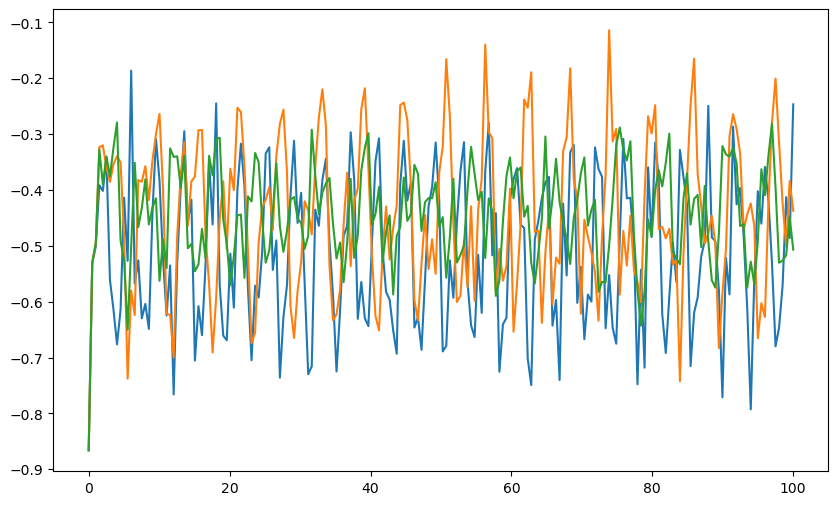

In [4]:

# Parameters
h_x = 1.05  # Strength of the transverse field
J = -1        # Interaction strength
h_z = -0.5    # Longitudinal field strength
L_values = [6,8, 10,12]  # Different system sizes
end_interval=100
dt=0.5
num_it=int(end_interval/dt)
t_values = np.linspace(0, end_interval, num_it)
def construct_sigma_x_1(L):
    # Pauli-X matrix
    sigma_x = np.array([[0, 1], [1, 0]])
    # Apply it to the first spin, and identity to others
    full_operator = sigma_x
    for _ in range(1, L):
        full_operator = np.kron(full_operator, np.eye(2))  # Identity matrix for each additional spin
    return full_operator
def construct_sigma_z_1(L):
    # Pauli-Z matrix
    sigma_z = np.array([[1, 0], [0, -1]])
    # Apply it to the first spin, and identity to others
    full_operator = sigma_z
    for _ in range(1, L):
        full_operator = np.kron(full_operator, np.eye(2))  # Identity matrix for each additional spin
    return full_operator
def construct_sigma_y_1(L):
    # Pauli-Y matrix
    sigma_y = np.array([[0, -1j], [1j, 0]])
    # Apply it to the first spin, and identity to others
    full_operator = sigma_y
    for _ in range(1, L):
        full_operator = np.kron(full_operator, np.eye(2))  # Identity matrix for each additional spin
    return full_operator

    

# Prepare plot
plt.figure(figsize=(10, 6))

for L in tqdm(L_values, desc="Calculating for system sizes"):
    hi = nk.hilbert.Spin(s=1/2, N=L)
    H = sum([h_x * nk.operator.spin.sigmax(hi, i) for i in range(L)]) 
    H+=  sum([J * nk.operator.spin.sigmaz(hi, i) * nk.operator.spin.sigmaz(hi, (i+1) % L) for i in range(L)]) 
    H+=  sum([h_z * nk.operator.spin.sigmaz(hi, i) for i in range(L)])

    # Diagonalize the Hamiltonian
    result = nk.exact.full_ed(H, compute_eigenvectors=True)
    eig_vals = result.eigenvalues
    eig_vecs = result.eigenvectors

    # Observable: Sigma^x on the first spin, now manually constructed
    sx_1_matrix = construct_sigma_x_1(L)
    matrix_elements = eig_vecs.conj().T @ sx_1_matrix @ eig_vecs
    # Define the initial state |zeta> tensor product over all sites
    zeta = np.array([1, -np.sqrt(3)]) / 2
    zeta /= np.linalg.norm(zeta)  # Normalize
    initial_state = zeta
    for _ in range(1, L):
        initial_state = np.kron(initial_state, zeta)
    coefficients = eig_vecs.conj().T @ initial_state

    # Compute time-dependent expectation value
    exp_values = []
    for t in t_values:
        time_dependent_term = np.exp(-1j * (eig_vals[:, np.newaxis] - eig_vals) * t)
        expectation_t = np.sum(coefficients.conj() * coefficients[:, np.newaxis] * time_dependent_term * matrix_elements)
        exp_values.append(expectation_t.real)

    # Plot results for this system size
    plt.plot(t_values, exp_values, label=f"L={L}")

# Finalize plot
plt.xlabel("Time (arbitrary units)")
plt.ylabel(r"Expectation Value of sigma_x")
plt.title("Time Dependence of expectation value of sigma_x")
plt.legend()
plt.savefig("Time dependence of expectation value of sigma_x")
plt.show()

In [ ]:
h_x = 1.05  # Strength of the transverse field
J = -1        # Interaction strength
h_z = -0.5    # Longitudinal field strength
L_values = [6,8, 10,12]  # Different system sizes
end_interval=100
dt=0.5
num_it=int(end_interval/dt)

t_values = np.linspace(0, end_interval, num_it)
plt.figure(figsize=(10, 6))
for L in tqdm(L_values, desc="Calculating for system sizes"):
    hi = nk.hilbert.Spin(s=1/2, N=L)
    H = sum([h_x * nk.operator.spin.sigmax(hi, i) for i in range(L)]) 
    H+=  sum([J * nk.operator.spin.sigmaz(hi, i) * nk.operator.spin.sigmaz(hi, (i+1) % L) for i in range(L)]) 
    H+=  sum([h_z * nk.operator.spin.sigmaz(hi, i) for i in range(L)])

    # Diagonalize the Hamiltonian
    result = nk.exact.full_ed(H, compute_eigenvectors=True)
    eig_vals = result.eigenvalues
    eig_vecs = result.eigenvectors

    # Observable: Sigma^x on the first spin, now manually constructed
    sz_1_matrix = construct_sigma_z_1(L)
    matrix_elements = eig_vecs.conj().T @ sz_1_matrix @ eig_vecs
    # Define the initial state |zeta> tensor product over all sites
    zeta = np.array([1, -np.sqrt(3)]) / 2
    zeta /= np.linalg.norm(zeta)  # Normalize
    initial_state = zeta
    for _ in range(1, L):
        initial_state = np.kron(initial_state, zeta)
    coefficients = eig_vecs.conj().T @ initial_state

    # Compute time-dependent expectation value
    exp_values = []
    for t in t_values:
        time_dependent_term = np.exp(-1j * (eig_vals[:, np.newaxis] - eig_vals) * t)
        expectation_t = np.sum(coefficients.conj() * coefficients[:, np.newaxis] * time_dependent_term * matrix_elements)
        exp_values.append(expectation_t.real)

    # Plot results for this system size
    plt.plot(t_values, exp_values, label=f"L={L}")

# Finalize plot
plt.xlabel("Time (arbitrary units)")
plt.ylabel(r"Expectation Value of sigma_z")
plt.title("Time Dependence of expectation value of sigma_z")
plt.legend()
plt.savefig("Time dependence of expectation value of sigma_z")
plt.show()

Calculating for system sizes: 100%|███████████████| 4/4 [01:28<00:00, 22.20s/it]


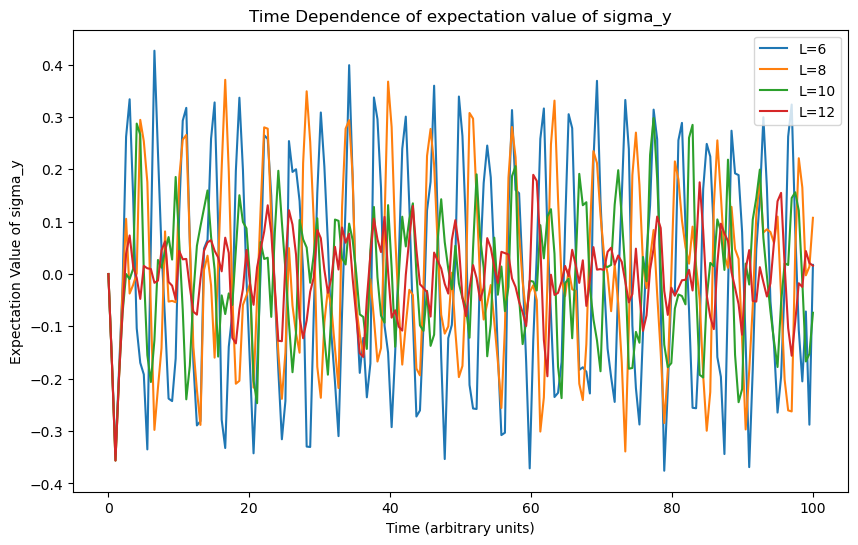

In [49]:
h_x = 1.05  # Strength of the transverse field
J = -1        # Interaction strength
h_z = -0.5    # Longitudinal field strength
L_values = [6,8, 10,12]  # Different system sizes
end_interval=100
dt=0.5
num_it=int(end_interval/dt)
t_values = np.linspace(0, end_interval, num_it)  # Time values for the simulation
plt.figure(figsize=(10, 6))

for L in tqdm(L_values, desc="Calculating for system sizes"):
    hi = nk.hilbert.Spin(s=1/2, N=L)
    H = sum([h_x * nk.operator.spin.sigmax(hi, i) for i in range(L)]) 
    H+=  sum([J * nk.operator.spin.sigmaz(hi, i) * nk.operator.spin.sigmaz(hi, (i+1) % L) for i in range(L)]) 
    H+=  sum([h_z * nk.operator.spin.sigmaz(hi, i) for i in range(L)])

    # Diagonalize the Hamiltonian
    result = nk.exact.full_ed(H, compute_eigenvectors=True)
    eig_vals = result.eigenvalues
    eig_vecs = result.eigenvectors

    # Observable: Sigma^x on the first spin, now manually constructed
    sy_1_matrix = construct_sigma_y_1(L)
    matrix_elements = eig_vecs.conj().T @ sy_1_matrix @ eig_vecs

    # Define the initial state |zeta> tensor product over all sites
    zeta = np.array([1, -np.sqrt(3)]) / 2
    zeta /= np.linalg.norm(zeta)  # Normalize
    initial_state = zeta
    for _ in range(1, L):
        initial_state = np.kron(initial_state, zeta)
    coefficients = eig_vecs.conj().T @ initial_state

    # Compute time-dependent expectation value
    exp_values = []
    for t in t_values:
        time_dependent_term = np.exp(-1j * (eig_vals[:, np.newaxis] - eig_vals) * t)
        expectation_t = np.sum(coefficients.conj() * coefficients[:, np.newaxis] * time_dependent_term * matrix_elements)
        exp_values.append(expectation_t.real)

    # Plot results for this system size
    plt.plot(t_values, exp_values, label=f"L={L}")

# Finalize plot
plt.xlabel("Time (arbitrary units)")
plt.ylabel(r"Expectation Value of sigma_y")
plt.title("Time Dependence of expectation value of sigma_y")
plt.legend()
plt.savefig("Time dependence of expectation value of sigma_y")
plt.show()

-5.455960043841971
L = 6, beta for initial state energy: 0.37
-7.274613391789298
L = 8, beta for initial state energy: 0.37
-9.093266739736634
L = 10, beta for initial state energy: 0.37
-10.91192008768397
L = 12, beta for initial state energy: 0.37
exp_neg_beta_H is [[2.10297911e+03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.46897206e+02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.21492983e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.10400275e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.98537567e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.72237040e-03]] sigma_x_full 4096.0 Z_beta 30363.50096389579
0.0
Expectation value of sigma_x at beta = 0.37 is 0.0


/var/folders/br/4wczwzw17jx79drl42zmh3j80000gn/T/ipykernel_22498/2082328030.py:76: UserWarning: Glyph 8 ) missing from current font.
  plt.savefig("Thermal energy vs inverse temperature")


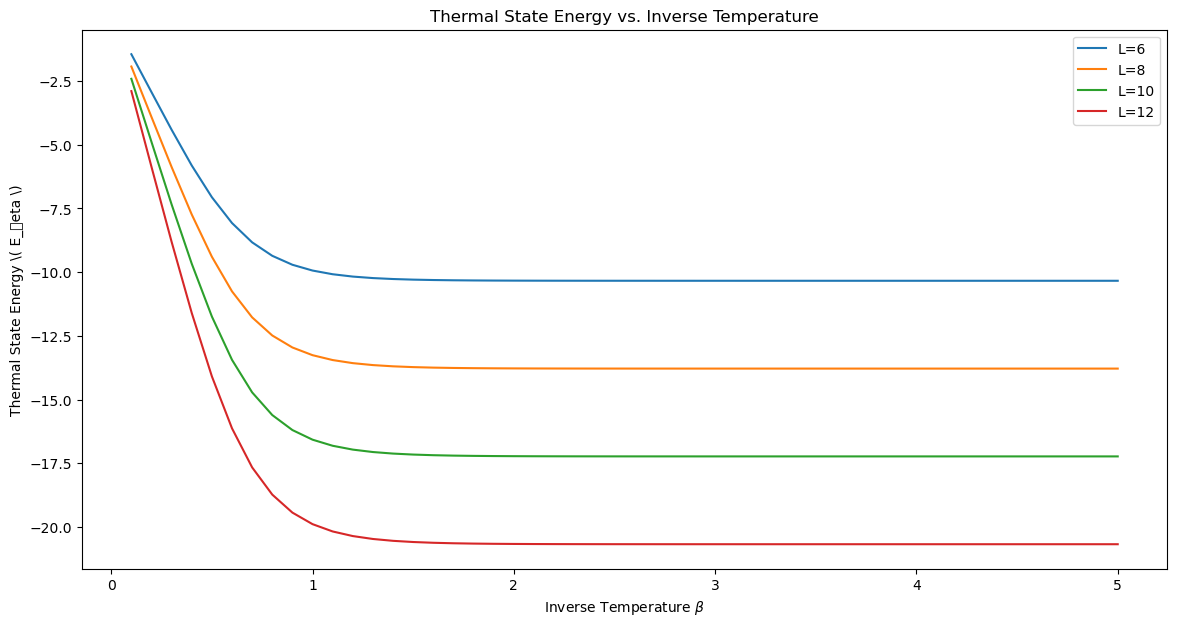

In [23]:
import numpy as np
import netket as nk
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.optimize import minimize_scalar

# Define system parameters
h_x = 1.05
J = -1
h_z = -0.5
L_values = [6, 8, 10, 12]  # Smaller system sizes for demonstration
beta_values = np.linspace(0.1, 5, 50)  # Range of inverse temperature values

def thermal_state_energy(energies, betas):
    """ Calculate the thermal state energy for a range of beta values. """
    thermal_energies = []
    for beta in betas:
        weights = np.exp(-beta * energies)
        Z_beta = np.sum(weights)
        E_beta = np.sum(weights * energies) / Z_beta
        thermal_energies.append(E_beta)
    return thermal_energies

plt.figure(figsize=(14, 7))

for L in L_values:
    # Setup the Hilbert space and Hamiltonian
    hi = nk.hilbert.Spin(s=1/2, N=L)
    H = sum([h_x * nk.operator.spin.sigmax(hi, i) for i in range(L)]) 
    H += sum([J * nk.operator.spin.sigmaz(hi, i) * nk.operator.spin.sigmaz(hi, (i+1) % L) for i in range(L)]) 
    H += sum([h_z * nk.operator.spin.sigmaz(hi, i) for i in range(L)])
    
    result = nk.exact.full_ed(H, compute_eigenvectors=True)
    eig_vals = result.eigenvalues

    # Calculate the thermal state energies
    E_betas = thermal_state_energy(eig_vals, beta_values)

    # Plot thermal state energies as a function of beta
    plt.plot(beta_values, E_betas, label=f"L={L}")
    zeta = np.array([1, -np.sqrt(3)]) / 2
    zeta /= np.linalg.norm(zeta)  # Normalize
    initial_state = zeta
    for _ in range(1, L):
        initial_state = np.kron(initial_state, zeta)
    
    # Calculate initial state energy for a typical ground state
    E_init_state=initial_state.conj().T @H.to_dense()@initial_state
    print(E_init_state)
    # Define the function to minimize
    func = lambda beta: abs(thermal_state_energy(eig_vals, [beta])[0] - E_init_state)
    res = minimize_scalar(func, bounds=(0.1, 5), method='bounded')
    print(f"L = {L}, beta for initial state energy: {res.x:.2f}")
exp_neg_beta_H = np.diag(np.exp(-0.37 * eig_vals))

# Calculate the partition function
Z_beta = np.sum(np.exp(-0.37 * eig_vals))

# Define sigma_x for the first spin
sigma_x_1 = np.array([[0, 1], [1, 0]])
sigma_x_full = sigma_x_1
for _ in range(1, L):
    sigma_x_full = np.kron(sigma_x_full, np.eye(2))  # Extend to the full Hilbert space

# Calculate the expectation value of sigma_x
print('exp_neg_beta_H is',exp_neg_beta_H, 'sigma_x_full',np.sum(sigma_x_full),'Z_beta',Z_beta)
expectation_sigma_x = np.trace(exp_neg_beta_H @ sigma_x_full) / Z_beta
print(expectation_sigma_x)
# Output the result
print("Expectation value of sigma_x at beta =", 0.37, "is", expectation_sigma_x)

plt.xlabel(r"Inverse Temperature $\beta$")
plt.ylabel("Thermal State Energy \( E_\beta \)")
plt.title("Thermal State Energy vs. Inverse Temperature")
plt.legend()
plt.savefig("Thermal energy vs inverse temperature")
plt.show()